# Data Project - Stock Market Analysis

Use pandas to get stock information, visualize different aspects of it and look at a few ways of analyzing the risk of a stock, based on its previous performance history, predicting future stock prices through a Monte Carlo method

Answering the following questions along the way:

1.) What was the change in price of the stock over time? 

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information

Requesting stock information with pandas and analyze basic attributes of a stock.

In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

In [ ]:
# For division
from __future__ import division

In [7]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

Use Yahoo and pandas to grab some data for some market stocks

In [57]:
# The tech stocks we'll use for this analysis
market_list = ['AAPL','PFE','MSFT','MRNA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe

for stock in market_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

AAPL - Apple Inc.

PFE - Pfizer Inc.

MSFT - Microsoft Corporation.

MRNA - Moderna, Inc.

In [58]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,100.021478,97.102599,98.542689,98.630039,1.566684e+08,98.367741
std,23.189173,22.672770,23.075369,22.934247,7.051207e+07,23.076996
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.665623,77.701876,78.704374,78.626249,1.072792e+08,78.349566
50%,98.237499,95.983749,96.992500,97.028751,1.375974e+08,96.687313
75%,119.622501,116.275002,118.322500,118.091249,1.875871e+08,118.040323
max,145.089996,136.539993,143.070007,142.919998,4.268848e+08,142.919998


In [59]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-27 to 2021-01-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


Plot out the volume and closing price of the stocks.

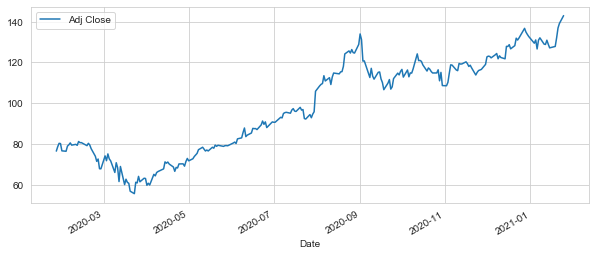

In [60]:
#Historical view of the closing price - AAPL
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

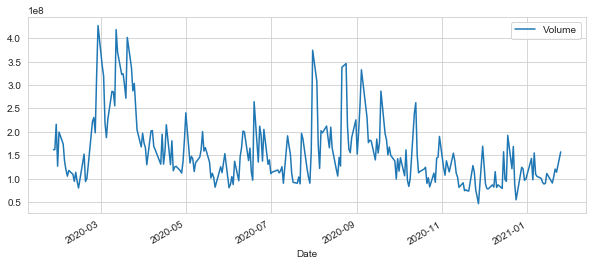

In [61]:
#Plot the total volume of stock being traded each day over the past 5 years - AAPL
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Calculate the moving average for the stock

In [62]:
#Plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.Series.rolling(AAPL['Adj Close'],ma).mean()

Plot all the additional Moving Averages

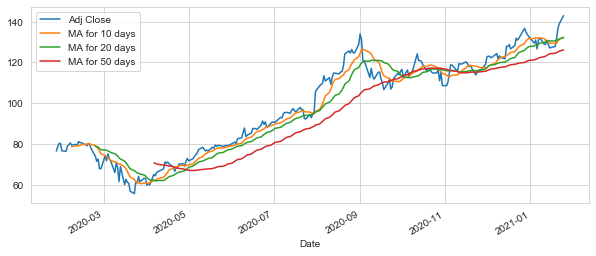

In [63]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Daily Return Analysis

Use pandas to retrieve teh daily returns for the Apple stock

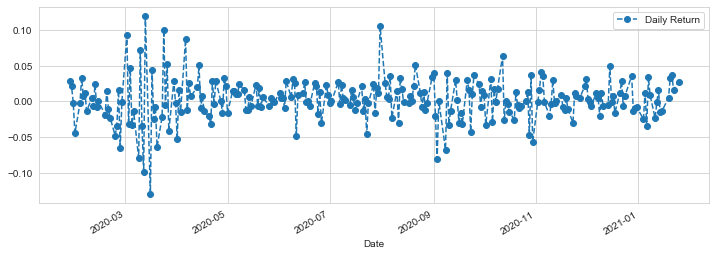

In [64]:
#Use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
#Plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Overall look at the average daily return using a histogram.

Use seaborn to create both a histogram and kde plot on the same figure.

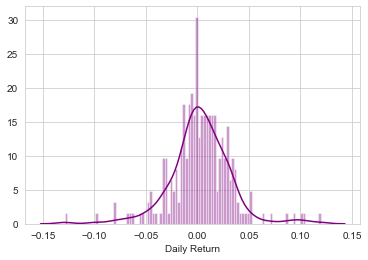

In [65]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [66]:
# Grab all the closing prices for the market stock list into one DataFrame
closing_df = DataReader(['AAPL','PFE','MSFT','MRNA'],'yahoo',start,end)['Adj Close']

In [67]:
closing_df.head()

Symbols,AAPL,PFE,MSFT,MRNA
Date,,,,
2020-01-27,76.576187,36.607071,160.578888,22.740000
2020-01-28,78.742477,34.765778,163.725555,22.360001
2020-01-29,80.390747,34.255318,166.278503,20.549999
2020-01-30,80.274246,34.135609,170.968826,20.990000
2020-01-31,76.714989,34.292156,168.445557,20.510000


Get the daily return for all the stocks

In [68]:
# Make a new market returns DataFrame
market_rets = closing_df.pct_change() 

Compare the daily percentage return of two stocks to check how correlated.

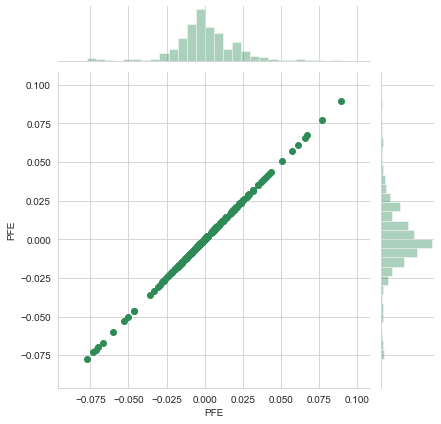

In [69]:
# Comparing Pfizer to itself,should show a perfectly linear relationship
sns.jointplot('PFE','PFE',market_rets,kind='scatter',color='seagreen')

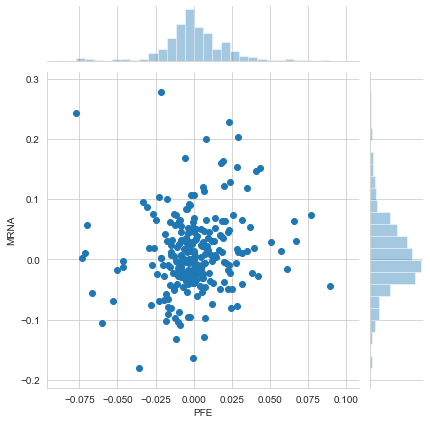

In [70]:
#Use joinplot to compare the daily returns of Pfizer and Moderna
sns.jointplot('PFE','MRNA',market_rets,kind='scatter')

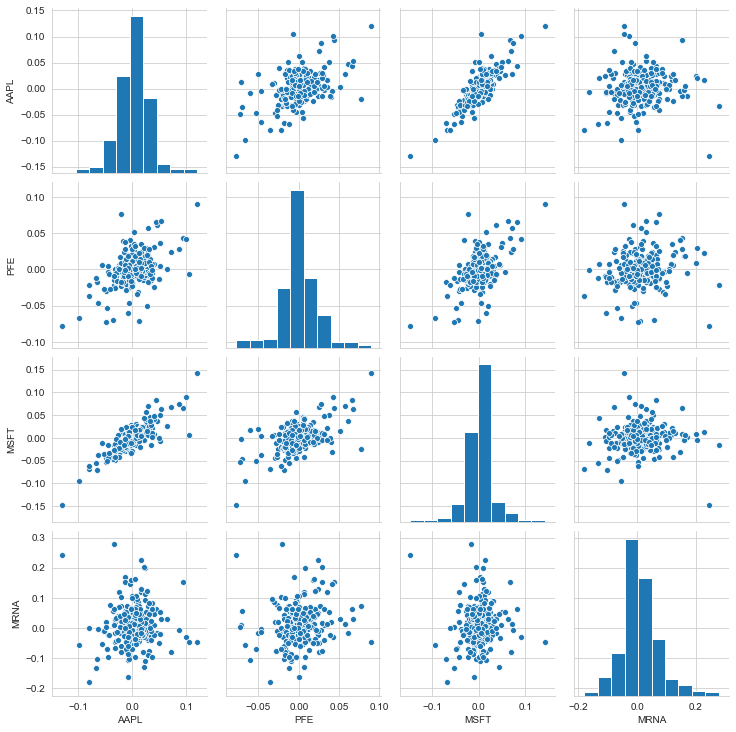

In [71]:
#Pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(market_rets.dropna())

A quick glance shows an interesting correlation between Apple and Microsoft daily returns.

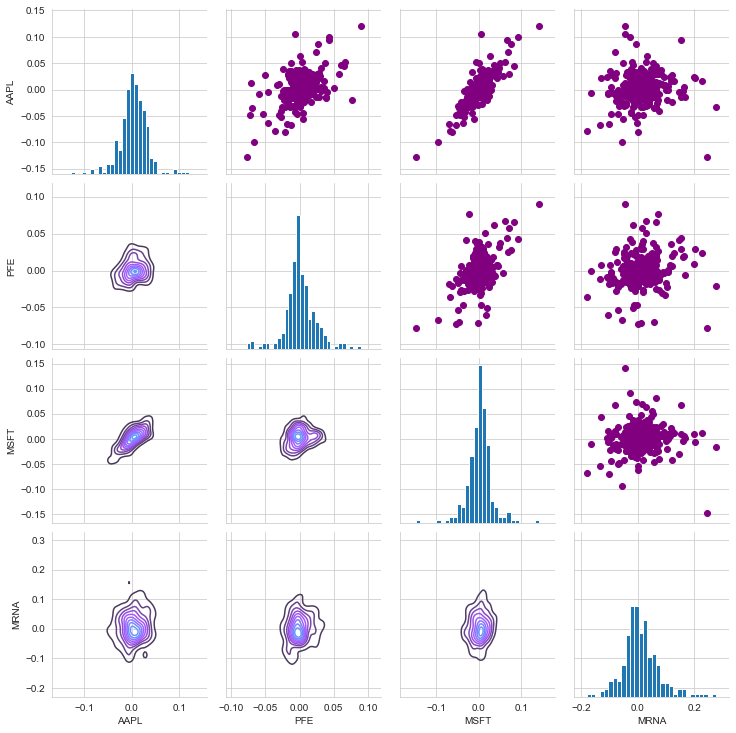

In [72]:
# Set up figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(market_rets.dropna())

# map_upper,specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# Define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Analyzed the correlation of the closing prices

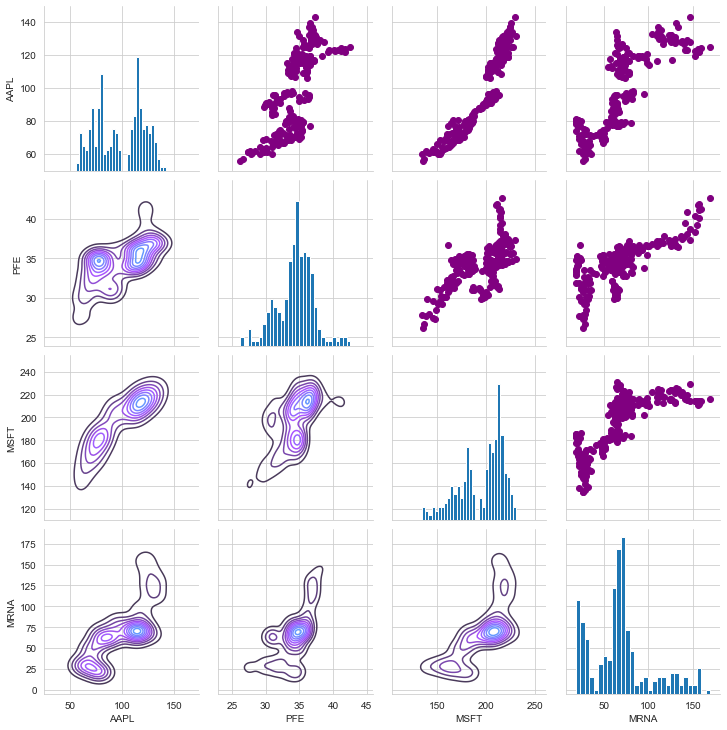

In [73]:
# Set up figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper, specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# Define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

By comparing the closing prices, the best relationship is between Microsoft and Apple,

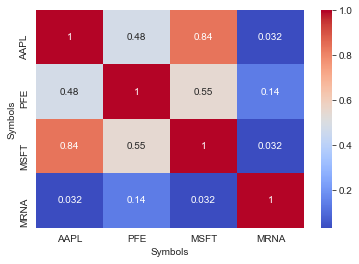

In [74]:
#Use seaborn for a quick correlation plot for the daily returns
sns.heatmap(market_rets.corr(),annot=True,cmap='coolwarm')

Apple and Microsoft had the strongest correlation of daily stock return. 

## Risk Analysis

Using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

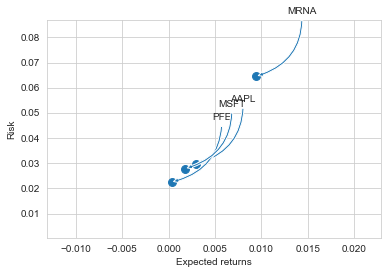

In [75]:
#Defining a new DataFrame as a clenaed version of the original market_rets DataFrame
rets = market_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60, 60),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=-0.4'))

### Value at Risk

Repeat the daily returns histogram for Apple stock.

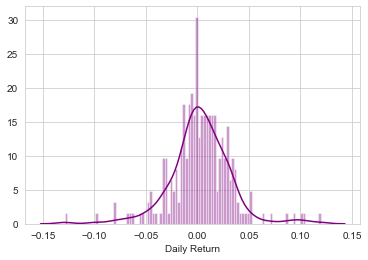

In [76]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [77]:
# The 0.05 empirical quantile of daily returns-Apple
rets['AAPL'].quantile(0.05)

-0.04492754728343229

The 0.05 empirical quantile of daily returns is at -0.044. 

That means that with 95% confidence, our worst daily loss will not exceed 4.4%. 

If we have a 1 million dollar investment, our one-day 5% VaR is 0.044 * 1,000,000 = $44,000.

In [43]:
# The 0.05 empirical quantile of daily returns-Pfizer
rets['PFE'].quantile(0.05)

-0.030039889258527963

The 0.05 empirical quantile of daily returns is at -0.030.

That means that with 95% confidence, our worst daily loss will not exceed 3.0%.

If we have a 1 million dollar investment, our one-day 5% VaR is 0.030 * 1,000,000 = $30,000.

In [44]:
# The 0.05 empirical quantile of daily returns-Microsoft
rets['MSFT'].quantile(0.05)

-0.04172660897702074

The 0.05 empirical quantile of daily returns is at -0.041.

That means that with 95% confidence, our worst daily loss will not exceed 4.1%.

If we have a 1 million dollar investment, our one-day 5% VaR is 0.041 * 1,000,000 = $41,000.

In [45]:
# The 0.05 empirical quantile of daily returns-Moderna
rets['MRNA'].quantile(0.05)

-0.08859369547452439

The 0.05 empirical quantile of daily returns is at -0.088.

That means that with 95% confidence, our worst daily loss will not exceed 8.8%.

If we have a 1 million dollar investment, our one-day 5% VaR is 0.088 * 1,000,000 = $88,000.

### Value at Risk using the Monte Carlo method

Define the variables,using the Pfizer DataFrame PFE to demonstrate a basic Monte Carlo method,start with just a few simulations.

In [78]:
# Set up time horizon
days = 365

#Delta
dt = 1/days

# Grab mu (drift) from the expected return data for PFE
mu = rets.mean()['PFE']

# Grab the volatility of the stock from the std() of the average return
sigma = rets.std()['PFE']

Create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated from our daily returns

In [79]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [49]:
PFE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-27,38.358635,37.239090,37.390892,38.102467,31964026.0,36.607071
2020-01-28,37.466793,36.005692,37.305504,36.185959,70202408.0,34.765778
2020-01-29,36.413662,35.626186,36.166985,35.654648,34165726.0,34.255318
2020-01-30,35.265656,34.810246,35.199242,35.170776,32316589.0,34.135609
2020-01-31,35.531307,35.009487,35.047440,35.332069,33894005.0,34.292156


In [53]:
from past.builtins import xrange

Text(0.5, 1.0, 'Monte Carlo Analysis for Pfizer')

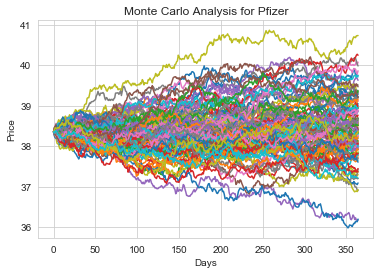

In [80]:
# Get start price from PFE.head()
start_price = 38.35

#range(100)=run- 100 times
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Pfizer')

Get a histogram of the end results for a much larger run.

In [81]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Plot a histogram ,as well as use qunatile to define our risk for this stock.

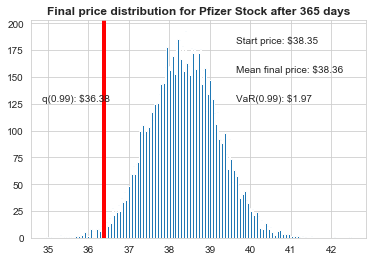

In [82]:
# Define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Pfizer Stock after %s days" % days, weight='bold');

The 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Pfizer stock, which looks to be $1.96 for every investment of 38.35 (the price of one inital Pfizer stock).

This basically menas for every initial stock you purchase your putting about $1.96 at risk 99% of the time from this Monte Carlo Simulation.